# import libs

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# import data

In [3]:
path = '/content/drive/My Drive/Colab Notebooks/image codes/exercicio_36_v1.csv'
dados = pd.read_csv(path)
dados.head()

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_1
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_1
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_1


# split dataframe 

In [0]:
set_1 = dados.query('set_ == "set_1"')


In [6]:
set_1.head()

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
1,2.0,2.0,2220.0,236.2254,85772.0000,40.4931,53.1657,set_1
2,3.0,3.0,1478.0,149.7401,58.4509,32.3893,43.3803,set_1
3,4.0,4.0,1262.0,136.1838,46123.0000,35.7796,40.0853,set_1
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_1


In [10]:
set_1.set_.value_counts()

set_1    160
Name: set_, dtype: int64

In [0]:
df1 = set_1.copy()

#funçtion remove outlier


In [0]:
# funcao principal

def limpeza(df,coluna):
    ''' faz a remoção de outliers no df.coluna desejado'''
    
    frame_de_outliers, _ = __separa_outliers(df,coluna)
    frame_sem_outliers = __remove_outliers(df, coluna)
       
    return  frame_de_outliers, frame_sem_outliers

In [52]:
a,b = limpeza(df1,'area')
b[10:20]

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
11,12.0,12.0,4815.0,294.1665,106.6351,61.3767,78.2985,set_1
12,13.0,13.0,6510.0,314.1665,98.2614,86.1987,91.0428,set_1
13,14.0,14.0,7884.0,336.7351,101.4844,99.9200,100.1909,set_1
14,15.0,15.0,1707.0,168.2254,49.7539,46463.0000,46.6200,set_1
15,16.0,16.0,707.0,111.2904,34.8355,28.1487,30003.0000,set_1
17,18.0,18.0,9774.0,383061.0000,124.8502,101.1178,111.5556,set_1
18,19.0,19.0,6318.0,325.8061,97843.0000,86.7009,89.6902,set_1
19,20.0,20.0,6264.0,305865.0000,98.5396,82.4586,89.3061,set_1
20,21.0,21.0,5462.0,295.4214,102.8607,68.8796,83.3933,set_1
21,22.0,22.0,6483.0,312.6934,102.3497,81.7811,90.8538,set_1


In [0]:
 # funcao topo do boxplot
def __topo(df,coluna):
    ''' inserir o dataframe e a coluna em que se vai realizar a limpeza'''
    Q3 = df['{}'.format(coluna)].quantile(q=0.75)
    Q1 = df['{}'.format(coluna)].quantile(q=0.25)
    IIQ = Q3-Q1
    topo = Q3 + IIQ * 1.5
    return topo


In [15]:
#teste da função __topo
a = __topo(df1, 'area')
print(a)
print(type(a))

17490.5
<class 'numpy.float64'>


In [0]:
# funcao separa outilers
def __separa_outliers(df,coluna):
    '''separa os outliers de um frame e retorna-os '''
    df_frame_outliers= df[df['{}'.format(coluna)] > (__topo(df,coluna))] 
    index_outliers = list(df_frame_outliers.index)
    return df_frame_outliers, index_outliers


In [43]:
# teste da funçao separa outliers
outliers, index_outliers = __separa_outliers(df1, 'area')
print(index_outliers)
print(outliers)


[0, 16, 52, 135, 138]
     index  labels        area  ...  minor_axis    eq_diam   set_
0      1.0     1.0  12057066.0  ...   3674.3981  3918.1033  set_1
16    17.0    17.0     30963.0  ...    149.6843   198.5531  set_1
52    53.0    53.0     27146.0  ...    183.0300   185.9122  set_1
135  136.0   136.0     21726.0  ...    179.6732   166.3202  set_1
138  139.0   139.0     19185.0  ...    133.9945   156.2917  set_1

[5 rows x 8 columns]


In [0]:
#funcao remove outliers do dataset
def __remove_outliers(df, coluna):
    '''remove os outliers do frame e retorna-o'''
    _,index_ = __separa_outliers(df,coluna)
    frame_sem_outliers = df.drop(axis = 0, index = index_)
    return frame_sem_outliers


In [0]:
framee = __remove_outliers(df1, 'area')


In [33]:
framee[10:20]

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
11,12.0,12.0,4815.0,294.1665,106.6351,61.3767,78.2985,set_1
12,13.0,13.0,6510.0,314.1665,98.2614,86.1987,91.0428,set_1
13,14.0,14.0,7884.0,336.7351,101.4844,99.9200,100.1909,set_1
14,15.0,15.0,1707.0,168.2254,49.7539,46463.0000,46.6200,set_1
15,16.0,16.0,707.0,111.2904,34.8355,28.1487,30003.0000,set_1
17,18.0,18.0,9774.0,383061.0000,124.8502,101.1178,111.5556,set_1
18,19.0,19.0,6318.0,325.8061,97843.0000,86.7009,89.6902,set_1
19,20.0,20.0,6264.0,305865.0000,98.5396,82.4586,89.3061,set_1
20,21.0,21.0,5462.0,295.4214,102.8607,68.8796,83.3933,set_1
21,22.0,22.0,6483.0,312.6934,102.3497,81.7811,90.8538,set_1


In [0]:
a,b = limpeza(df1,'perimeter')

In [54]:
a

,index,labels,area,perimeter,mahor_axis,minor_axis,eq_diam,set_
0,1.0,1.0,12057066.0,54735.7112,4944.8175,3674.3981,3918.1033,set_1
4,5.0,5.0,1798.0,165397.0000,61.1904,38.4644,47.8465,set_1
9,10.0,10.0,6076.0,306066.0000,93.1224,86.1361,87.9557,set_1
16,17.0,17.0,30963.0,913.6367,322.2773,149.6843,198.5531,set_1
17,18.0,18.0,9774.0,383061.0000,124.8502,101.1178,111.5556,set_1
19,20.0,20.0,6264.0,305865.0000,98.5396,82.4586,89.3061,set_1
32,33.0,33.0,875.0,119598.0000,43.7116,25.9571,33.3779,set_1
36,37.0,37.0,3355.0,247196.0000,72.9591,63564.0000,65.3584,set_1
37,38.0,38.0,316.0,79598.0000,27.8356,16.2836,20.0585,set_1
39,40.0,40.0,4135.0,253664.0000,92.2256,58.8533,72.5593,set_1


In [56]:
df1.perimeter.describe()

count       160.000000
mean      25211.059345
std       80823.904141
min          51.656900
25%         204.342425
50%         316.977750
75%         402.582475
max      461262.000000
Name: perimeter, dtype: float64

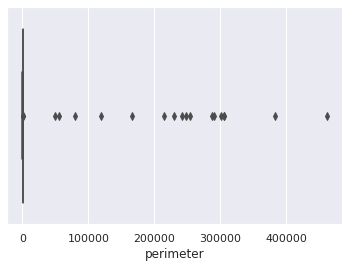

# function graphs

## histogram

In [0]:
# sturges
def __sturges(a1): 
    '''devolve numero de bins de um histograma para um dataset. Argumento = dataset'''
    k = int(1 + 10/3 *np.log10(len(a1)))
    return k


In [0]:
#histograma
def plot_hist(a1,a2,a3,):
        ''' a1 - df(adc coluna)
        a3 - normalizar histograma (T or F) \n
        a4 - titulo
        ax1 - use para multiplot ''' 
        ax = sns.distplot(a1, bins = __sturges(a1), kde = False, norm_hist = a2, )
        sns.set(style='whitegrid')
        ax.figure.set_size_inches(15,5)
        ax.set_title(a3, fontsize = 16, color = 'white')
        ax.set_xlim(left = 0)
        return ax


## boxplot

In [0]:
#boxplot
def plot_boxplot(a1,a2,a3,):
    '''a1 - ['nome_da_coluna']
     a2 - df
     a3 - titulo
     ax2 - use para multiplot'''
    sns.set(style='whitegrid')
    ax = sns.boxplot(x = a1, data = a2, )
    ax.figure.set_size_inches(15,5)
    ax.set_title(a3 , fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    return ax

## violinplot

In [0]:
#violinplot
def plot_violin(a1,a2,a3):
    '''a1 - ['nome_da_coluna']
     a2 - df
     a3 - titulo
     ax1 - use para multiplot'''
    ax = sns.violinplot(x = a1, data = a2)
    sns.set(style='whitegrid')
    ax.figure.set_size_inches(15,5)
    ax.set_title(a3 , fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    return ax

## swarmplot

In [0]:
#swarmplot
def plot_swarm(a1,a2,a3, ):
    '''a1 - 'nome_da_coluna'
     a2 - df
     a3 - titulo
     ax1 = use para multiplot'''
    sns.set(style='whitegrid')
    ax = sns.swarmplot(x = a1, data = a2, color='red', alpha = 0.75 )
    ax.figure.set_size_inches(15,5)
    ax.set_title(a3 , fontsize = 16, color = 'white')
    ax.set_xlim(left = 0)
    return ax